# Project: Investigating a Soccer database of European countries from 2008-2016


## Introduction: 
This is a soccer database provided by kaggle by collecting several data of  performances from all teams in European Leagues, Individual player data performances and Team data performances. 
From this database, I have decided to collect information such as: 1) Player with most improved performance in all of Europe, 2) Top rated teams based on Team Attributes and 3) Player with most penalty convertion rates.

In [31]:
#importing datasets
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns
import itertools

## Data Wrangling:

In this section data is cleaned by trimming unwanted columns and also appending column from other datasets for better comparision

### Data Gathering

In [32]:
#connect to the database and load all the tables in python code
fut= sqlite3.connect('database.sqlite')
country= pd.read_sql('SELECT * FROM Country', fut)
league= pd.read_sql('SELECT * FROM League', fut)
match= pd.read_sql('SELECT * FROM Match', fut)
player= pd.read_sql('SELECT * FROM Player', fut)
pa= pd.read_sql('SELECT * FROM Player_Attributes', fut)
team= pd.read_sql('SELECT * FROM Team', fut)
ta= pd.read_sql('SELECT * FROM Team_Attributes', fut)

### Data Assessing 

In [33]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [34]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [35]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [36]:
match.shape

(25979, 115)

In [37]:
#checking NaN values in match
match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

### Data Cleaning

In [38]:
#checking date datatype in match, team_attributes, player_attributes column
match['date'].dtypes, ta['date'].dtypes, pa['date'].dtypes


(dtype('O'), dtype('O'), dtype('O'))

In [39]:
#changing datatype of date to datetime
match_new['date']= pd.to_datetime(match_new['date'])
pa['date']= pd.to_datetime(pa['date'])
ta['date']= pd.to_datetime(ta['date'])
player['birthday']= pd.to_datetime(player['birthday'])
#checking datatypes
match_new['date'].dtypes, ta['date'].dtypes, pa['date'].dtypes, player['birthday'].dtypes

(dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'))

In [40]:
#check when season starts and season ends
for season in match_new['season'].unique():
    min= match_new.query('season== @season')['date'].min()
    max= match_new.query('season== @season')['date'].max()
    print("<", season, ">", "min:", min, "max:", max)

< 2008/2009 > min: 2008-07-18 00:00:00 max: 2009-05-31 00:00:00
< 2009/2010 > min: 2009-07-11 00:00:00 max: 2010-05-16 00:00:00
< 2010/2011 > min: 2010-07-17 00:00:00 max: 2011-05-29 00:00:00
< 2011/2012 > min: 2011-07-16 00:00:00 max: 2012-05-23 00:00:00
< 2012/2013 > min: 2012-07-13 00:00:00 max: 2013-06-02 00:00:00
< 2013/2014 > min: 2013-07-13 00:00:00 max: 2014-05-18 00:00:00
< 2014/2015 > min: 2014-07-18 00:00:00 max: 2015-05-31 00:00:00
< 2015/2016 > min: 2015-07-17 00:00:00 max: 2016-05-25 00:00:00


This shows that season every year starts at "july" and ends at "may" of next year

In [41]:
# appending season column in team attributes and player attributes which helps for comparision purposes
# we create a function to decide for which season a particular date belongs to
def decide_season(date):
    if date.month >= 7:
        return str(date.year)+ "/" + str(date.year + 1)
    else:
        return str(date.year - 1)+ "/" + str(date.year)
#test function
decide_season(pd.to_datetime('2009-08-06')), decide_season(pd.to_datetime('2011-10-10'))

('2009/2010', '2011/2012')

In [42]:
#append 'season' column in team attributes and player attributes
pa['season']= pa['date'].apply(lambda t: decide_season(t))
pa.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2014/2015
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2006/2007


In [43]:
#merge player data in player_attributes data for better comparision
player_combine= player.merge(pa, left_on= 'player_api_id', right_on= 'player_api_id', how= 'inner')
player_combine.shape
player_combine.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,218353,2016-02-18,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,218353,2015-11-19,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,218353,2015-09-21,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,218353,2015-03-20,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2014/2015
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,218353,2007-02-22,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2006/2007


# Data Analysis:

## 1) Which player has shown most improvement in his career

In [44]:
# function for measuring the difference for max overall avergae ratings and min overall average ratings
def measuring_ratings(player_id):
    season_rating= player_combine.query('player_api_id == @player_id').groupby('season')['overall_rating'].mean()
    return season_rating.max() - season_rating.min()

#check function
measuring_ratings(155782)

23.375

In [45]:
#create improved performance of all the players
player['improved_performance']= player['player_api_id'].apply(lambda p: measuring_ratings(p))
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,improved_performance
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4.333333
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,23.375000
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,10.200000
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,7.000000
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,8.000000


In [14]:
player.sort_values('improved_performance', ascending= False, inplace= True)
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,improved_performance
6715,6725,129944,Marco Reus,188350,1989-05-31,180.34,165,42.000000
3460,3464,41841,Francesco Della Rocca,178043,1987-09-14,182.88,161,39.000000
2835,2838,107417,Eden Hazard,183277,1991-01-07,172.72,163,37.666667
8915,8929,115591,Ricardo Rodriguez,193352,1992-08-25,180.34,170,37.666667
8696,8710,41433,Radja Nainggolan,178518,1988-05-04,175.26,143,37.000000


##  The most improved performance in all of europe is: Marco Reus

In [15]:
#check marco reus ratings throughout his career
player_combine.query('player_api_id == 129944').groupby('season')['overall_rating'].mean()

season
2006/2007    44.000000
2008/2009    53.500000
2009/2010    71.000000
2010/2011    76.500000
2011/2012    80.500000
2012/2013    84.000000
2013/2014    84.909091
2014/2015    86.000000
2015/2016    86.000000
Name: overall_rating, dtype: float64

Marco Reus overall rating for 2007/2008 season is missing. Therefore, I have filled it by calculating the mean for better graphical representation.

In [16]:
# since 2007/2008 season is missing, we fill it with the mean of 2006/2007 and 2008/2009
reus_rating= player_combine.query('player_api_id == 129944').groupby('season')['overall_rating'].mean()
reus_rating['2007/2008']= (reus_rating['2006/2007'] + reus_rating['2008/2009'])/2
reus_rating.sort_index(inplace= True)
reus_rating

season
2006/2007    44.000000
2007/2008    48.750000
2008/2009    53.500000
2009/2010    71.000000
2010/2011    76.500000
2011/2012    80.500000
2012/2013    84.000000
2013/2014    84.909091
2014/2015    86.000000
2015/2016    86.000000
Name: overall_rating, dtype: float64

Marco Reus has played for 3 teams in his career so far which are Rot Weiss Ahlen, Borussia Monchengladbach and Borussia Dortmund in which all teams belong to Bundesliga. (Source: wikipedia)


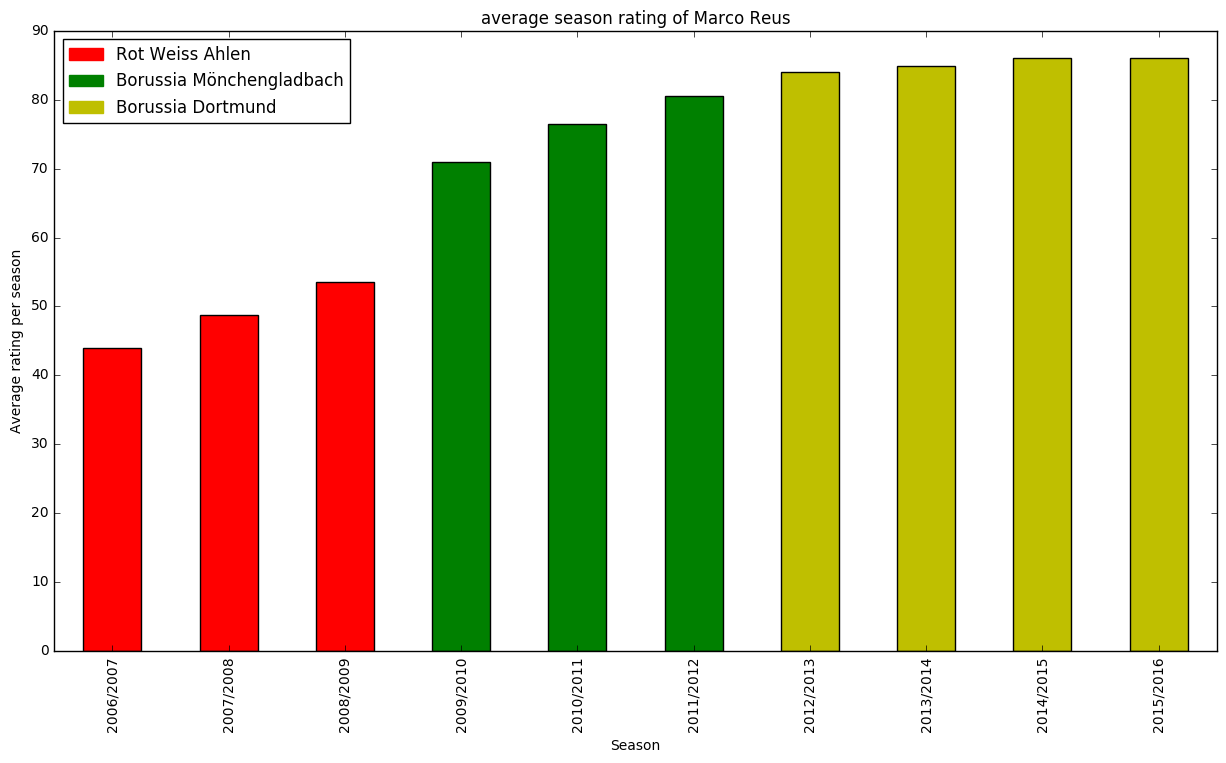

In [17]:
# visualising marco reus performance throughout his career
team_color= ['r', 'r', 'r', 'g','g','g', 'y','y','y','y']
au= reus_rating.plot(kind= 'bar', title= 'average season rating of Marco Reus', color= team_color, figsize= (15, 8))
au.set_xlabel('Season')
au.set_ylabel('Average rating per season')
RWA = mpatches.Patch(color='r', label='Rot Weiss Ahlen')
BM = mpatches.Patch(color='g', label='Borussia Mönchengladbach')
BD = mpatches.Patch(color='y', label='Borussia Dortmund')
plt.legend(handles=[RWA, BM, BD,], loc='best')

## 2) Top teams categorized by team attributes

The important team attributes such a Build up play, Chance creation, Defensive aggression are categorized with top teams in Europe.

In [30]:
#merging team data in team attributes data for better comparision
team_info =  ta.merge(team,left_on="team_api_id",right_on="team_api_id",how="left")
team_info.head()


,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


In [46]:
#dropping unwanted data from team attributes data
team_info = team_info.drop(['id_x','id_y', 'team_fifa_api_id_y'],axis=1)

In [47]:
#listing top teams based on their respective team attributes
columns= team_info.columns
cat_col= columns[columns.str.contains("Class")].tolist()
num_col= [x for x in team_info.columns if x not in columns[columns.str.contains("Class")].tolist()+["team_api_id"]+['team_fifa_api_id_x']+["date"]+['team_long_name']+[ 'team_short_name']]
categorical_team_info = team_info[cat_col+["team_api_id"]+['team_fifa_api_id_x']+["date"]+['team_long_name']+[ 'team_short_name']]
numerical_team_info   = team_info[num_col+["team_api_id"]+['team_fifa_api_id_x']+["date"]+['team_long_name']+[ 'team_short_name']]

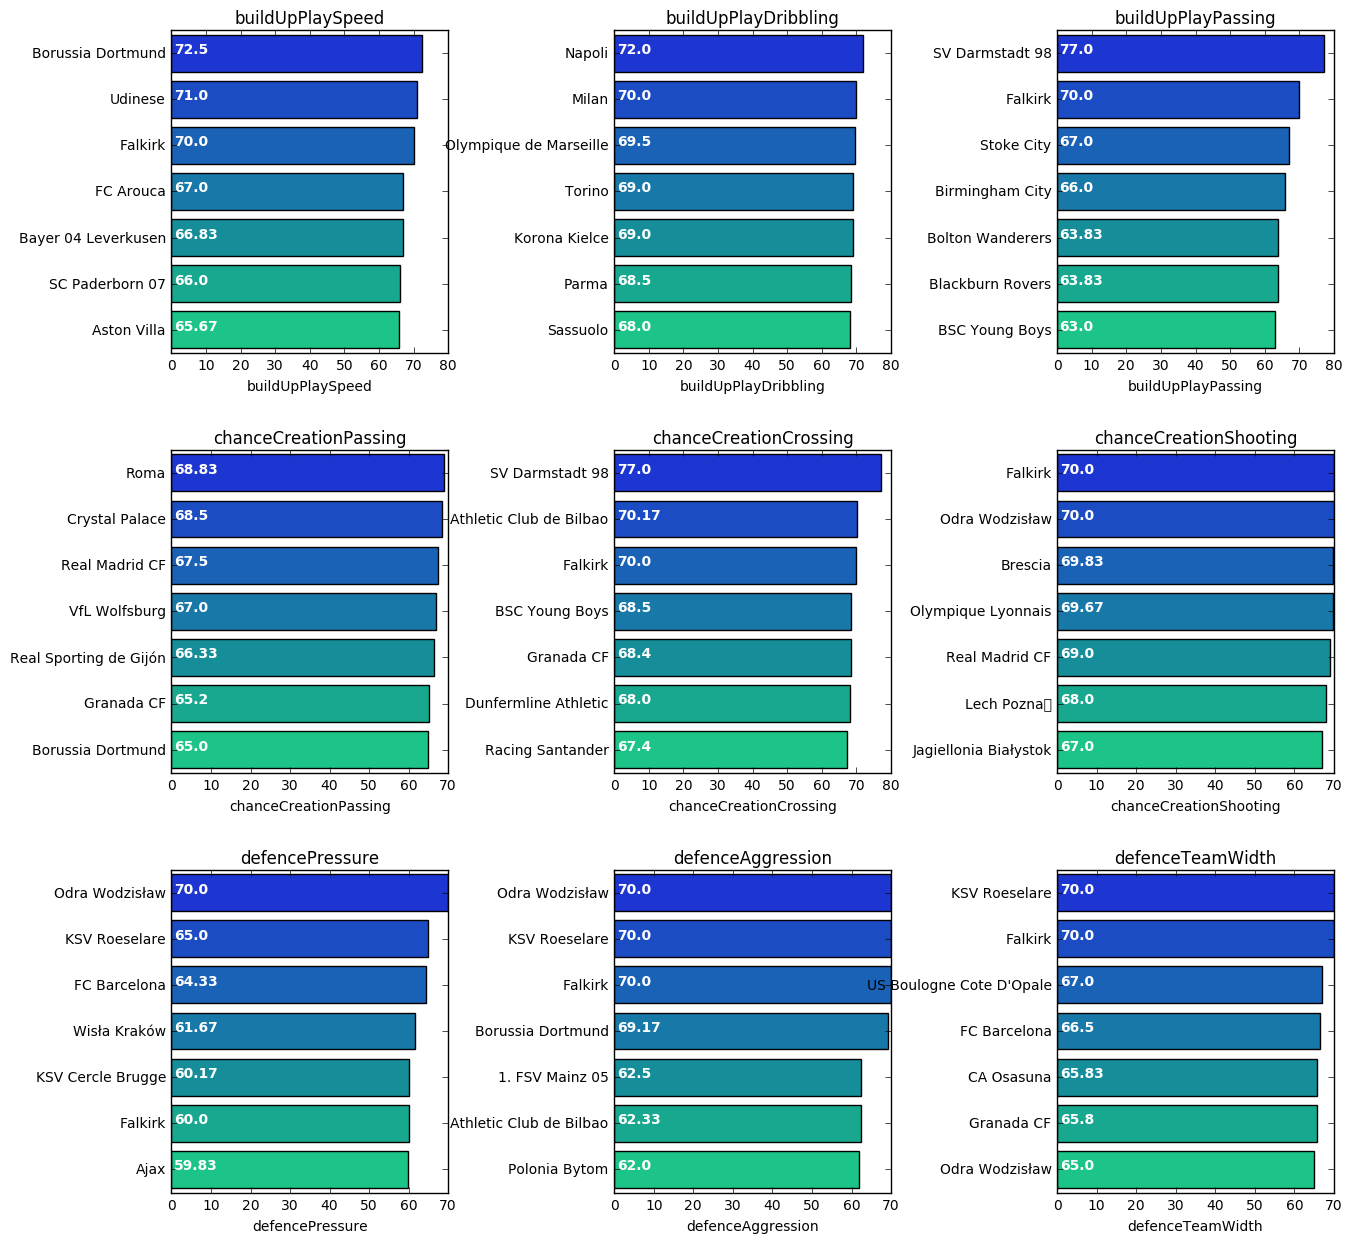

In [48]:
#plotting for team attributes
numerical_team_info
n = numerical_team_info.groupby("team_long_name")[num_col].mean().reset_index()
cols = [x for x in n.columns if x not in ["team_long_name"]]
length = len(cols)
plt.figure(figsize=(15,15))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(length/3,length/3,j+1)
    ax = sns.barplot(i,"team_long_name",data=n.sort_values(by=i,ascending=False)[:7],palette="winter")
    plt.title(i)
    plt.subplots_adjust(wspace = .6,hspace =.3)
    plt.ylabel("")
    for i,j in enumerate(round(n.sort_values(by = i,ascending=False)[i][:7],2)):
        ax.text(.7,i,j,weight = "bold",color="white") 

## 3) Player with best penalty convertion rate in all European leagues

In [49]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float6

In [50]:
# creating function to determine the player with most penalties taken
# first we check if any NaN values are in the dataset
pa.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [55]:
#function for creating penalty ratings of all players
def most_penalties(player_id):
    penalty_rating= player_combine.query('player_api_id == @player_id').groupby('season')['penalties'].mean()
    return penalty_rating.mean()

#testing function
most_penalties(30582)



39.833333333333336

In [56]:
#create penalty ratings of all the players
player['penalty_ratings']= player['player_api_id'].apply(lambda n: most_penalties(n))
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,improved_performance,penalty_ratings
8284,8296,26099,Paolo Maldini,1109,1968-06-26,185.42,187,5.00,92.666667
9243,9257,30592,Roy Makaay,10704,1975-03-09,187.96,165,14.50,89.625000
2264,2267,38248,Dario Smoje,167502,1978-09-19,193.04,181,3.00,89.166667
3478,3482,30714,Francesco Totti,1238,1976-09-27,180.34,181,10.60,88.353333
373,374,30727,Alessandro Del Piero,1075,1974-11-09,175.26,163,14.25,87.541667


In [54]:
player.sort_values('penalty_ratings', ascending= False, inplace= True)
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,improved_performance,penalty_ratings
8284,8296,26099,Paolo Maldini,1109,1968-06-26,185.42,187,5.00,92.666667
9243,9257,30592,Roy Makaay,10704,1975-03-09,187.96,165,14.50,90.750000
2264,2267,38248,Dario Smoje,167502,1978-09-19,193.04,181,3.00,89.666667
3478,3482,30714,Francesco Totti,1238,1976-09-27,180.34,181,10.60,88.500000
373,374,30727,Alessandro Del Piero,1075,1974-11-09,175.26,163,14.25,88.375000


## Paolo Maldini has the best penalty conversion rate in whole of Europe

In [30]:
#check paolo maldini's ratings throughout his career
player_combine.query('player_api_id == 26099').groupby('season')['penalties'].mean()

season
2006/2007    94.0
2007/2008    94.0
2008/2009    90.0
Name: penalties, dtype: float64

Since Paolo Maldini retired after 2008/2009 season, the data for rest of the seasons are unavailable